In [197]:
# 집단감염 vs 개별감염 환자 간 증상발현 -> 확진판정의 신속함 비교
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
warnings.filterwarnings(action='ignore')

search_trend = pd.read_csv('SearchTrend.csv')
policy = pd.read_csv('Policy.csv')
patientinfo = pd.read_csv('PatientInfo.csv')
patientroute = pd.read_csv('PatientRoute.csv')
time = pd.read_csv('time.csv')
timeage = pd.read_csv('TimeAge.csv')
region = pd.read_csv('Region.csv')
timegender = pd.read_csv('timegender.csv')
seoulfloating = pd.read_csv('SeoulFloating.csv')
case = pd.read_csv('Case.csv')
timeprovince = pd.read_csv('TimeProvince.csv')
# corr_df = df[['Price', 'Rate', 'Size', 'Brightness', 'Color', 'Thickness', 'Tacktile']]
infectionDF = patientinfo[['infection_case', 'symptom_onset_date', 'confirmed_date']]

# print(infectionDF.shape)
# print(infectionDF.isnull().sum())
infectionDF.dropna(inplace=True)
# print(infectionDF.shape)
length = len(infectionDF['infection_case'])

# 개별감염과 집단감염 여부를 구분하기 위한 감염경로 리스트 화
# infectionList = []
# for i in range(length):
#     infectionList.append(patientinfo['infection_case'][i])
# infectionList
# new_list = []
# for v in infectionList:
#     if v not in new_list:
#         new_list.append(v)
# for l in new_list:
#     print(l)

# 개별감염, 집단감염 데이터프레임 열 추가
infectionDF['infection_type'] = 'group'
# print(infectionDF)
infectionDF['infection_type'].loc[(infectionDF['infection_case'] == 'overseas inflow')] = 'individual'
infectionDF['infection_type'].loc[(infectionDF['infection_case'] == 'contact with patient')] = 'individual'
infectionDF['infection_type'].loc[(infectionDF['infection_case'] == 'etc')] = 'individual'
print(infectionDF['infection_type'].value_counts())

individual_list = []
group_list = []

individual_time = 0
group_time = 0

infectionList = infectionDF.values.tolist()
del infectionList[199]

# 진단시간 계산
for i in range(len(infectionList)):
    c_time = (infectionList[i][1].split("-"))
    c_date = datetime(int(c_time[0]), int(c_time[1]), int(c_time[2]))
    r_time = (infectionList[i][2].split("-"))
    r_date = datetime(int(r_time[0]), int(r_time[1]), int(r_time[2]))
    result = r_date-c_date
#     print(result.days)
    infectionList[i].append(result.days)
#     print(infectionList[i])
    
for i in infectionList:
    if i[3] == 'individual':
        individual_list.append(i)
    else:
        group_list.append(i)

for i in individual_list:
    individual_time += i[-1]
for g in group_list:
    group_time += g[-1]

individual_result = individual_time/len(individual_list)
group_result = group_time/len(group_list)
print("개별감염 평균 진료시간: ", individual_result)
print("집단감염 평균 진료시간: ", group_result)

individual    398
group         122
Name: infection_type, dtype: int64
개별감염 평균 진료시간:  4.375314861460957
집단감염 평균 진료시간:  5.278688524590164


In [15]:
import folium
import csv
import pandas as pd
from datetime import datetime, timedelta

loc_before = []
loc_after = []

Route_csv = pd.read_csv('PatientRoute.csv')
Policy_csv = pd.read_csv('Policy.csv')
# print(Policy_csv)

standard_date_str = '2020-04-16'

standard_date = datetime.strptime(standard_date_str, "%Y-%m-%d")

start_date = standard_date + timedelta(days=-7)
start_date_str = str(start_date)[:10]
end_date = standard_date + timedelta(days= 7)
end_date_str = str(end_date)[:10]

Route_csv_filtered_bool_before = Route_csv['date'].between(start_date_str,standard_date_str)
Route_.ipynb_checkpoints/efore = Route_csv[Route_csv_filtered_bool_before][['latitude','longitude']]

for i in range(len(Route_csv)):
    if Route_csv_filtered_bool_before[i] == True:
        loc_before.append([Route_before.loc[i][0],Route_before.loc[i][1]])
        
Route_csv_filtered_bool_after = Route_csv['date'].between(standard_date_str,end_date_str)
Route_after = Route_csv[Route_csv_filtered_bool_after][['latitude','longitude']]

for i in range(len(Route_csv)):
    if Route_csv_filtered_bool_after[i] == True:
        loc_after.append([Route_after.loc[i][0],Route_after.loc[i][1]])

m = folium.Map(
    location = [36.5053542, 127.7043419],
    zoom_start = 8,
    tiles = 'Cartodb Positron'
)

print(len(loc_before))
print(len(loc_after))
 
for i in range(len(loc_before)):
    folium.Circle(
        location = loc_before[i],
        radius = 50,
        color = 'red',
#         ‘red’, ‘blue’, ‘green’, ‘purple’, ‘orange’, ‘darkred’, ’lightred’, ‘beige’, ‘darkblue’, ‘darkgreen’, 
#         ‘cadetblue’, ‘darkpurple’, ‘white’, ‘pink’, ‘lightblue’, ‘lightgreen’, ‘gray’, ‘black’, ‘lightgray’ 
        fill = 'crimson',
    ).add_to(m)
    
for i in range(len(loc_after)):
    folium.Circle(
        location = loc_after[i],
        radius = 50,
        color = 'blue',
        fill = 'crimson',
    ).add_to(m)

# m.save('map.html')

423
156


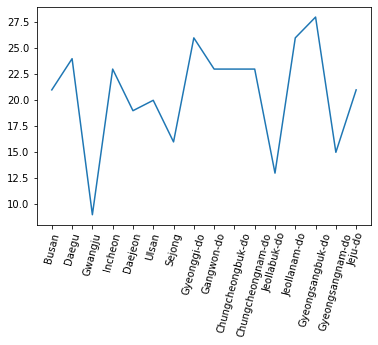

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

search_trend = pd.read_csv('SearchTrend.csv')
policy = pd.read_csv('Policy.csv')
patientinfo = pd.read_csv('PatientInfo.csv')
patientroute = pd.read_csv('PatientRoute.csv')
time = pd.read_csv('time.csv')
timeage = pd.read_csv('TimeAge.csv')
region = pd.read_csv('Region.csv')
timegender = pd.read_csv('timegender.csv')
seoulfloating = pd.read_csv('SeoulFloating.csv')
case = pd.read_csv('Case.csv')
timeprovince = pd.read_csv('TimeProvince.csv')

patientinfo['released_date'] = pd.to_datetime(patientinfo['released_date'])
patientinfo['confirmed_date'] =  pd.to_datetime(patientinfo['confirmed_date'])
patientinfo['recoverydays'] = patientinfo['released_date'] - patientinfo['confirmed_date']

patientinfo['recoverydays'] = patientinfo['recoverydays']

patientinfo.groupby('province')['recoverydays'].head()

recover_by_region = patientinfo.groupby('province')['recoverydays'].sum() /\
patientinfo.groupby('province')['recoverydays'].count()

recover_by_region.dropna()

patientinfo['province'].unique()
recover_by_region.to_csv('recover_by_region.csv')

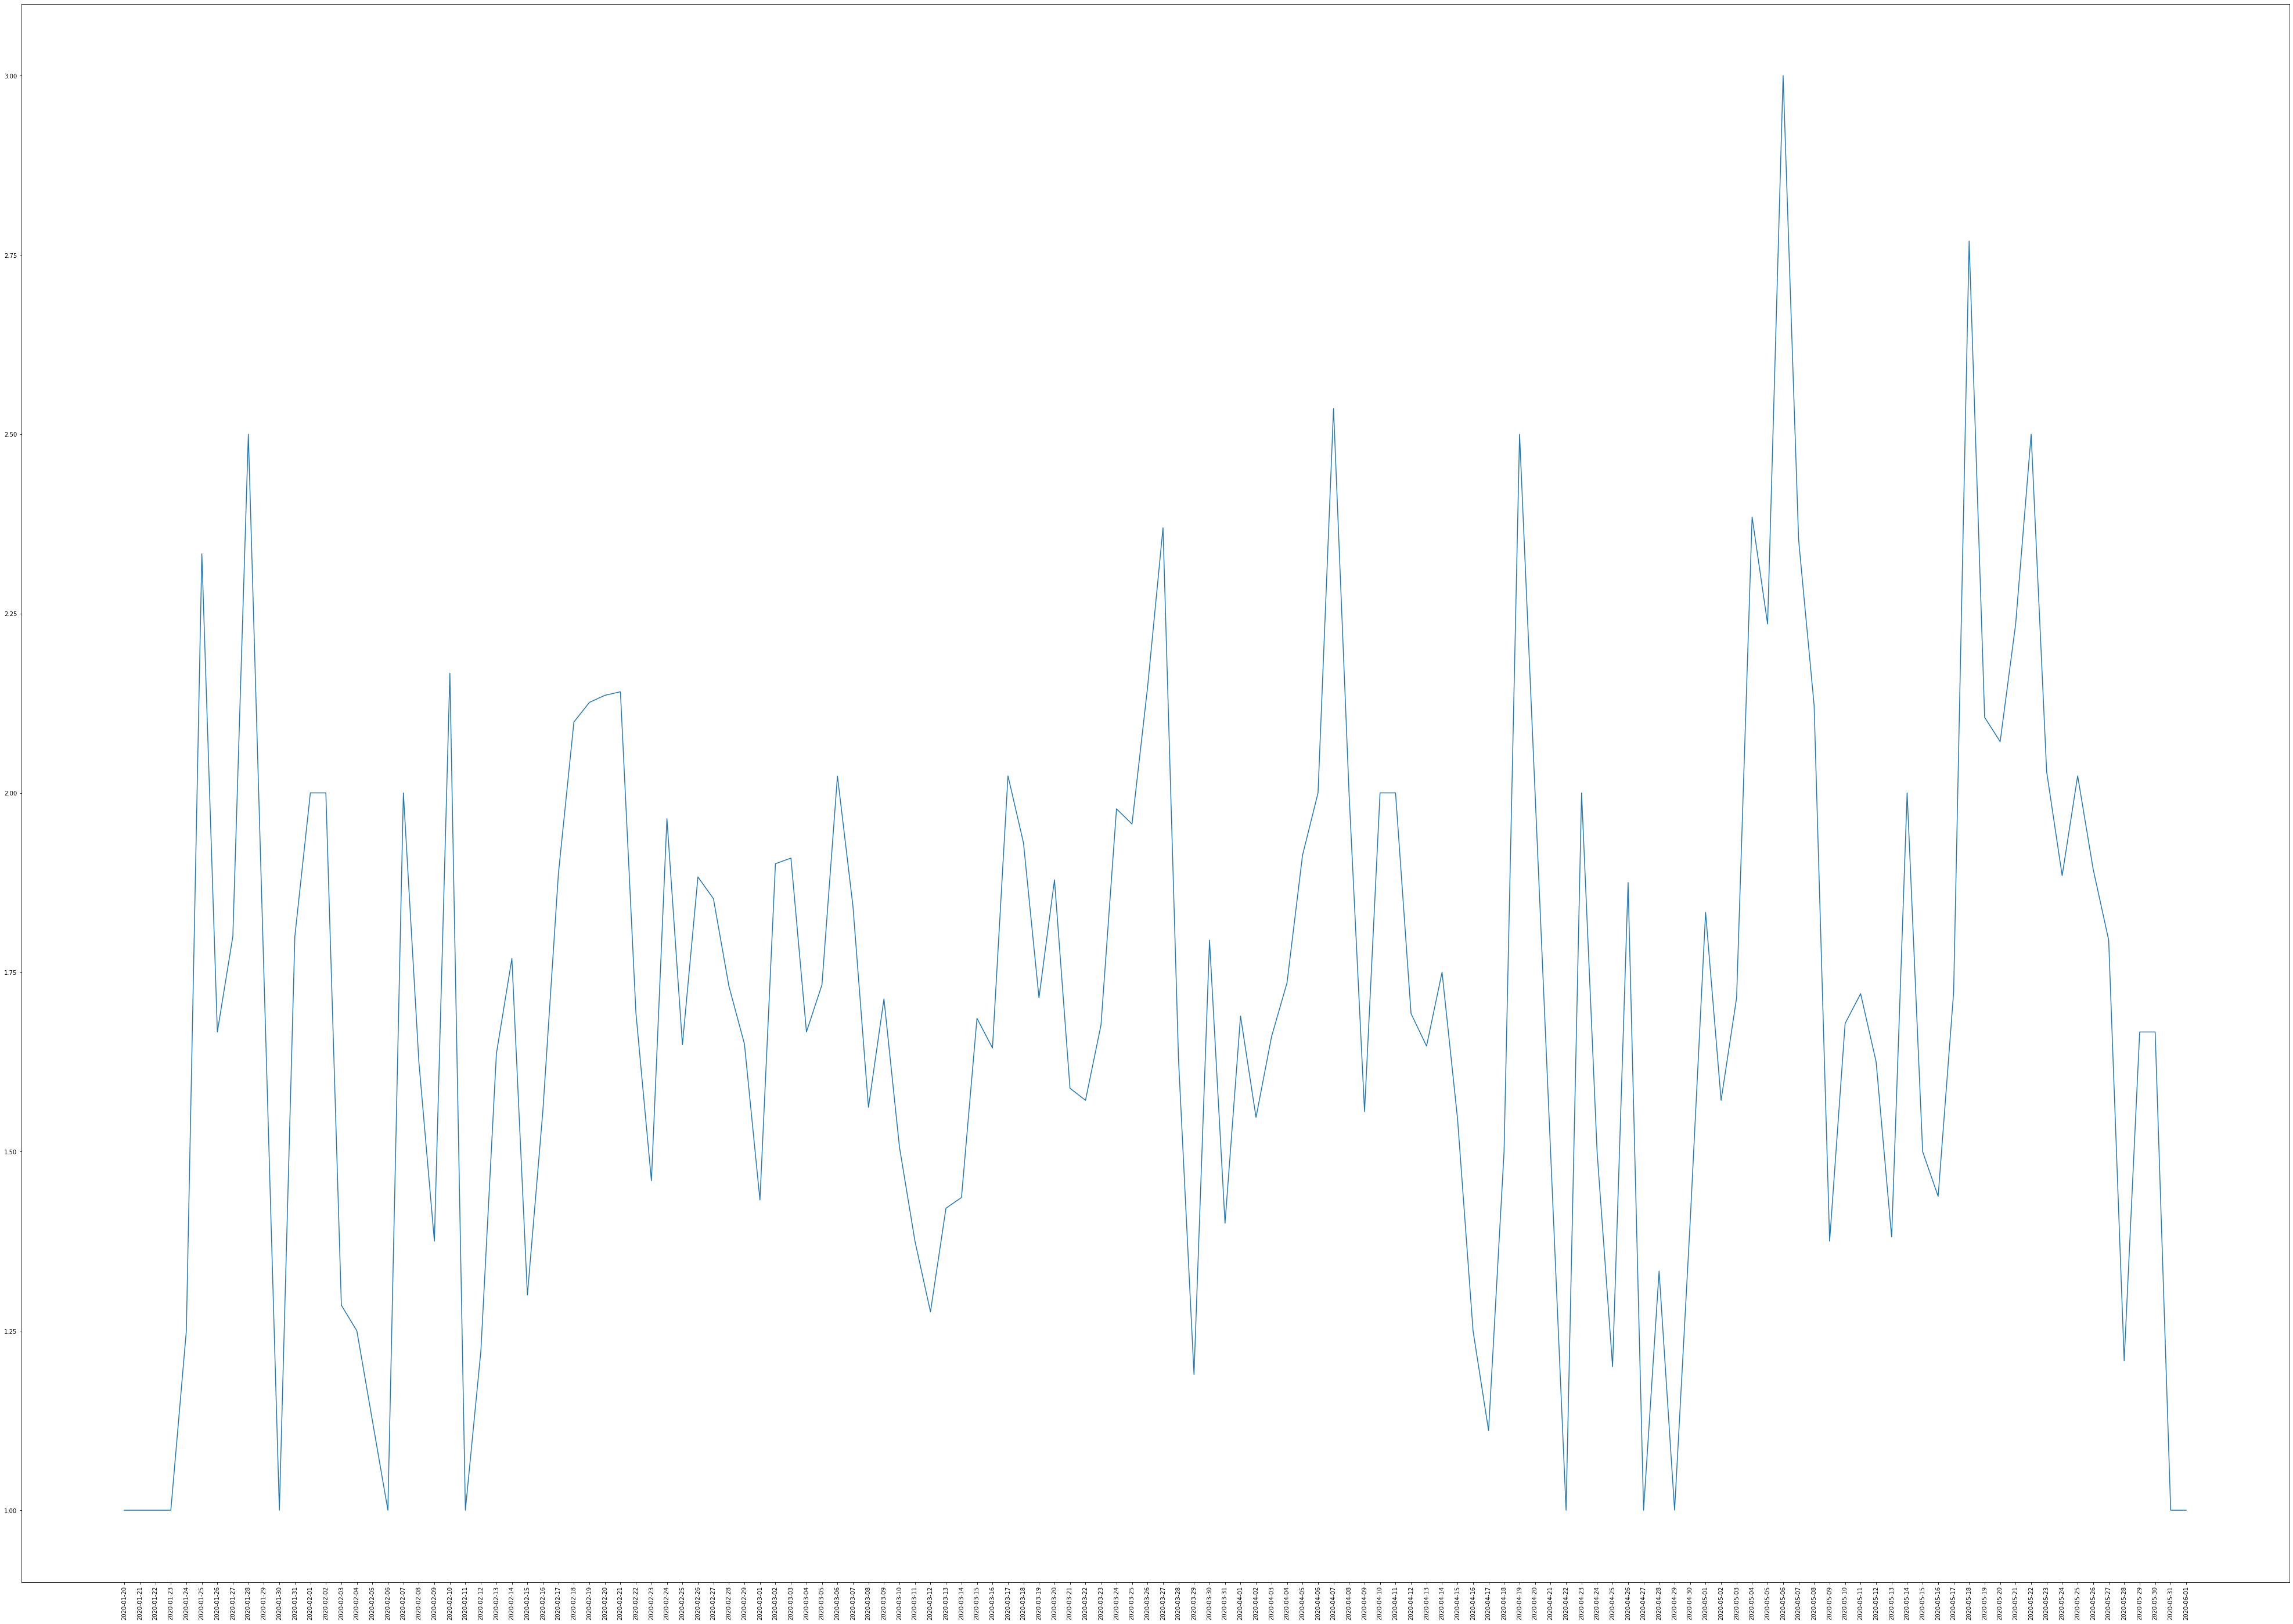

In [11]:
patientroute.groupby('date')['patient_id'].count()
patientroute.groupby('date')['patient_id'].nunique()
move_count = patientroute.groupby('date')['patient_id'].count() / patientroute.groupby('date')['patient_id'].nunique()

plt.figure(figsize=(70, 50))
plt.plot(move_count.index, move_count)

plt.xticks(rotation=90)
plt.show()
move_count.to_csv('move_count.csv')

In [14]:
loc_before = []
loc_after = []

patientroute = pd.read_csv('PatientRoute.csv')

standard_date_str = '2020-04-10'

standard_date = datetime.strptime(standard_date_str, "%Y-%m-%d")

start_date = standard_date + timedelta(days=-7)
start_date_str = str(start_date)[:10]
end_date = standard_date + timedelta(days= 7)
end_date_str = str(end_date)[:10]

Route_csv_filtered_bool_before = patientroute['date'].between(start_date_str,standard_date_str)
Route_before = patientroute[Route_csv_filtered_bool_before][['latitude','longitude']]

for i in range(len(patientroute)):
    if Route_csv_filtered_bool_before[i] == True:
        loc_before.append([Route_before.loc[i][0],Route_before.loc[i][1]])
        
Route_csv_filtered_bool_after = patientroute['date'].between(standard_date_str,end_date_str)
Route_after = patientroute[Route_csv_filtered_bool_after][['latitude','longitude']]

for i in range(len(patientroute)):
    if Route_csv_filtered_bool_after[i] == True:
        loc_after.append([Route_after.loc[i][0],Route_after.loc[i][1]])

m = folium.Map(
    location = [36.5053542, 127.7043419],
    zoom_start = 8,
    tiles = 'Cartodb Positron'
)

print(len(loc_before))
print(len(loc_after))
 
for i in range(len(loc_before)):
    folium.Circle(
        location = loc_before[i],
        radius = 50,
        color = 'red',
#         ‘red’, ‘blue’, ‘green’, ‘purple’, ‘orange’, ‘darkred’, ’lightred’, ‘beige’, ‘darkblue’, ‘darkgreen’, 
#         ‘cadetblue’, ‘darkpurple’, ‘white’, ‘pink’, ‘lightblue’, ‘lightgreen’, ‘gray’, ‘black’, ‘lightgray’ 
        fill = 'crimson',
    ).add_to(m)
    
for i in range(len(loc_after)):
    folium.Circle(
        location = loc_after[i],
        radius = 50,
        color = 'blue',
        fill = 'crimson',
    ).add_to(m)
    
m.save('map.html')

423
156


In [16]:
import folium
import csv
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt